<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Log" data-toc-modified-id="Log-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Log</a></span></li></ul></li><li><span><a href="#Pickle" data-toc-modified-id="Pickle-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Pickle</a></span><ul class="toc-item"><li><span><a href="#Everything" data-toc-modified-id="Everything-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Everything</a></span></li><li><span><a href="#Subset" data-toc-modified-id="Subset-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Subset</a></span></li></ul></li><li><span><a href="#DataLoaders" data-toc-modified-id="DataLoaders-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>DataLoaders</a></span></li><li><span><a href="#Model-Architecture" data-toc-modified-id="Model-Architecture-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model Architecture</a></span><ul class="toc-item"><li><span><a href="#Model-architecture" data-toc-modified-id="Model-architecture-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Model architecture</a></span></li></ul></li><li><span><a href="#Loss-Function" data-toc-modified-id="Loss-Function-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Loss Function</a></span><ul class="toc-item"><li><span><a href="#Working-with-a-batch" data-toc-modified-id="Working-with-a-batch-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Working with a batch</a></span></li><li><span><a href="#Make-anchors" data-toc-modified-id="Make-anchors-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Make anchors</a></span></li><li><span><a href="#IOU" data-toc-modified-id="IOU-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>IOU</a></span></li></ul></li></ul></div>

## Log

Video: https://www.youtube.com/watch?v=0frKXR-2PBY

- 2020-10-27 (Tues): Started implementing Jeremy's solution w/ anchor boxes in 2018.9. Made progress. Left off video at 57:49.

# Pickle

## Everything

In [ ]:
# from fastai.vision.all import *

# # paths
# path = Path('/home/rory/data/coco2017')
# train_im_dir, valid_im_dir = 'train2017', 'val2017'
# train_json = 'annotations/instances_train2017.json'
# valid_json = 'annotations/instances_val2017.json'
# animals = ['giraffe','cat','zebra','dog','bird','elephant','horse','cow']

# # get items & annos
# def get_annos(path, anno_file, im_folder):
#     xs, ys = get_annotations(path/anno_file)
#     return L(xs).map(lambda x: path/im_folder/x), ys
# train_paths, train_annos = get_annos(path, train_json, train_im_dir)
# valid_paths, valid_annos = get_annos(path, valid_json, valid_im_dir)
# paths  = train_paths + valid_paths
# annos  = train_annos + valid_annos
# bboxes = [a[0] for a in annos]
# lbls   = [a[1] for a in annos]

# # create df and pkl
# df = pd.DataFrame({
#     "path": paths,
#     "lbl":  lbls,
#     "bbox": bboxes,
#     "is_valid": [0]*len(train_files) + [1]*len(valid_files),
#     "n_items": L(len(l) for l in lbls)
#     })
# df.to_pickle(path/'20201027_coco_df.pkl')

# df.head(1)

## Subset

**Animals pickle:**

In [ ]:
# from fastai.vision.all import *

# # paths
# path = Path('/home/rory/data/coco2017')
# train_im_dir, valid_im_dir = 'train2017', 'val2017'
# train_json = 'annotations/instances_train2017.json'
# valid_json = 'annotations/instances_val2017.json'
# animals = ['giraffe','cat','zebra','dog','bird','elephant','horse','cow']

# # get items & annos
# def get_annos(path, anno_file, im_folder):
#     xs, ys = get_annotations(path/anno_file)
#     return L(xs).map(lambda x: path/im_folder/x), ys
# train_files, train_annos = get_annos(path, train_json, train_im_dir)
# valid_files, valid_annos = get_annos(path, valid_json, valid_im_dir)
# annos = train_annos + valid_annos
# bboxes = L(L(b) for b,l in annos)
# lbls   = L(L(l) for b,l in annos)

# # get label subset
# def flatten(l):
#     def _recur(l,res):
#         for o in l:
#             if   isinstance(o,list): _recur(o,res)
#             elif isinstance(o,L)   : _recur(o,res)
#             else: res.append(o)
#         return res
#     return _recur(l, L())
# lbls_flat = flatten(lbls)
# def get_count(lbl): return len(lbls_flat.filter(lambda x: x==lbl))
# lbls_sorted = sorted(lbls_flat.unique(), key=get_count, reverse=True)
# lbl_cts = [(l, get_count(l)) for l in lbls_sorted]
# lbl_ss = [l for l,c in lbl_cts if 5000<c<30000]
# lbl_ss.remove('traffic light')
# lbl_ss.remove('motorcycle')
# lbl_ss.remove('bus')

# # get subset items & annos
# ss_idxs   = L(L(o in lbl_ss for o in l) for l in lbls)
# ss_lbls   = L(o[i] for o,i in zip(lbls,ss_idxs))
# ss_bboxes = L(o[i] for o,i in zip(bboxes,ss_idxs))
# ss_obj    = L(len(l) for l in ss_lbls)

In [ ]:
# # create df
# df = pd.DataFrame({
#     "path"  : train_files + valid_files,
#     "lbl"   : ss_lbls,
#     "bbox"  : ss_bboxes,
#     "n_obj" : ss_obj
#     })

# # remove rows w/ 4+ objects per im
# # reduce value counts to a max of 2*min_vc
# too_many = 4
# rng = list(range(too_many))
# cts = list(df['n_obj'].value_counts())[:too_many]
# minv = min(cts)
# zipd = list(zip(*[rng,cts]))
# zipd[0] = (0, minv) # limit ims w/zero objs
# df = pd.concat([df[df['n_obj']==i].sample(n=min(s,minv*2)) for i,s in zipd])

# # create pkl
# df.to_pickle(path/'20201029_coco_ss_df.pkl')

# DataLoaders

In [ ]:
from fastai.vision.all import *


### Params ###
im_size    = 224
batch_size = 64
path       = Path('/home/rory/data/coco2017')
valid_pct  = .10
# anchors
k = 1
anc_grid = 4


### Items ###
df = pd.read_pickle(path/'20201029_coco_ss_df.pkl')
# get items
def get_cols(df,cols): return L(L(df[c].to_list()) for c in cols)
paths, bboxes, lbls  = get_cols(df, ['path', 'bbox', 'lbl'])
p2b = {p:b for p,b in zip(paths,bboxes)}
p2l = {p:l for p,l in zip(paths,lbls)}
def get_bbox(p): return p2b[p]
def get_lbl(p):  return p2l[p]


### DataBlock & DataLoaders ###
db = DataBlock(
    blocks=[ImageBlock, BBoxBlock, BBoxLblBlock],
    get_y=[get_bbox, get_lbl],
    splitter=RandomSplitter(valid_pct),
    item_tfms=Resize(im_size, method='squish'),
    batch_tfms=Normalize.from_stats(*imagenet_stats),
    n_inp=1)
dls = db.dataloaders(paths)
print("Training n:",int(len(df)*(1-valid_pct)))

Training n: 56857


# Model Architecture

## Model architecture

In [ ]:
# 42:33
class StdConv(nn.Module):
    def __init__(self, nin, nout, stride=2, drop=0.1):
        super().__init__()
        self.conv = nn.Conv2d(nin, nout, 3, stride=stride, padding=1)
        self.bn = nn.BatchNorm2d(nout)
        self.drop = nn.Dropout(drop)
        
    def forward(self, x): return self.drop(self.bn(F.relu(self.conv(x))))

In [ ]:
# 42:33
def flatten_conv(x,k): return x.view(x.size(0), x.size(1)//k, -1).transpose(1,2) # loss func expects flat tensor

In [ ]:
# 42:33
class OutConv(nn.Module):
    # output is two conv layers (instead of one linear layer)
    def __init__(self, k, nin, bias):
        super().__init__()
        self.k = k
        self.oconv1 = nn.Conv2d(nin, 4*k, 3, padding=1)              # bbs
        self.oconv2 = nn.Conv2d(nin, len(dls.vocab)*k, 3, padding=1) # lbls
        self.oconv2.bias.data.zero_().add_(bias)
        
    def forward(self, x):
        return [flatten_conv(self.oconv1(x), self.k),
                flatten_conv(self.oconv2(x), self.k)]

In [ ]:
# 42:00
class SSD_Head(nn.Module):
    def __init__(self, k, bias):
        super().__init__()
        self.drop = nn.Dropout(0.25)
        self.sconv0 = StdConv(512,256, stride=1)
#         self.sconv1 = StdConv(256,256)
        self.sconv2 = StdConv(256,256)
        self.out = OutConv(k, 256, bias)
        
    def forward(self, x):
        x = self.drop(F.relu(x))
        x = self.sconv0(x)
#         x = self.sconv1(x)
        x = self.sconv2(x)
        return self.out(x)

head_reg4 = SSD_Head(k, -3.)
body = create_body(resnet34, pretrained=True)
class custom_module(Module):
    
    def __init__(self, body, head):
        self.body, self.head = body, head
        
    def forward(self, x):
        return self.head(self.body(x))
mod = custom_module(body, head_reg4)
learner = Learner(dls, mod)

# Loss Function

## Working with a batch

In [ ]:
### Show ###
def show_bb(im,bb,lbl=None,sz=224,figsize=[5,5],color='white',ctx=None,use_vocab=True):
    bboxes = TensorBBox((bb+1)*sz//2)
    if lbl!=None:
        if use_vocab==True:
            try: label = dls.vocab[lbl]
            except: label = lbl
        else: label = lbl
        lbboxes = LabeledBBox(bboxes, label)
    if ctx==None: ctx=show_image(im, figsize=figsize)
    else: show_image(im, figsize=figsize, ctx=ctx)
    if lbl!=None: lbboxes.show(ctx=ctx) # draw white bboxes and lbls
    bboxes.show(ctx=ctx, color=color) # draw colored bboxes over white bboxes
    return ctx

In [ ]:
# ims, bbs, lbls
batch = dls.one_batch()
learner.model.eval()
preds = learner.model(batch[0].cpu())
pred_bboxes, pred_lbls = preds

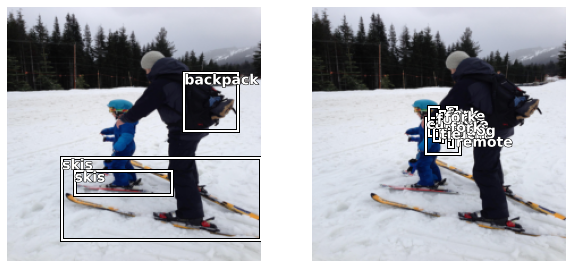

In [ ]:
idx=2
pred_bbox, pred_lbl = pred_bboxes[idx], pred_lbls[idx]
dec_batch = dls.decode(batch)
dec_im = dec_batch[0][idx]
bbox, lbl = batch[1][idx].cpu(), batch[2][idx].cpu()

ctx = get_grid(2, figsize=[10,10])
show_bb(dec_im, bbox, lbl, ctx=ctx[0])
show_bb(dec_im, pred_bbox, pred_lbl.max(1)[1], ctx=ctx[1]);

## Make anchors

In [ ]:
anc_offset = 1/(anc_grid*2)
anc_x = np.repeat(np.linspace(anc_offset, 1-anc_offset, anc_grid), anc_grid)
anc_y = np.tile(  np.linspace(anc_offset, 1-anc_offset, anc_grid), anc_grid)

anc_ctrs = np.tile(np.stack([anc_x,anc_y], axis=1), (k,1))
anc_sizes = np.array([[1/anc_grid,1/anc_grid] for i in range(anc_grid*anc_grid)])
anchors = Tensor(np.concatenate([anc_ctrs, anc_sizes], axis=1))

In [ ]:
# make anchor bboxes in fastai2 format
anc_bbox = torch.stack([2*(anchors[:,0]-anchors[:,3]/2)-1,
                        2*(anchors[:,1]-anchors[:,2]/2)-1,
                        2*(anchors[:,0]+anchors[:,3]/2)-1,
                        2*(anchors[:,1]+anchors[:,2]/2)-1], axis=1)

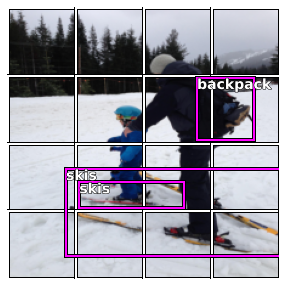

In [ ]:
# show anchorbbs and targbbs together
ctx = show_bb(dec_im, anc_bbox)
show_bb(dec_im, bbox, lbl, ctx=ctx, color='magenta');

## IOU

In [ ]:
# 1:05:36
def intersxn(b1,b2):
    x1 = torch.max((b1)[:,None,0], (b2)[None,:,0])
    y1 = torch.max((b1)[:,None,1], (b2)[None,:,1])
    x2 = torch.min((b1)[:,None,2], (b2)[None,:,2])
    y2 = torch.min((b1)[:,None,3], (b2)[None,:,3])
    return torch.clamp((x2-x1), min=0) * torch.clamp((y2-y1), min=0)

def bb_area(b):
    return (b[:,2]-b[:,0]) * (b[:,3]-b[:,1])

def iou(b1, b2):
    inter = intersxn(b1,b2)
    union = bb_area(b1).unsqueeze(1) + bb_area(b2).unsqueeze(0) - inter
    return inter / union

In [ ]:
# Get IOUs
# ~58min
ious = iou(bbox,anc_bbox)
max_iou_bbs  = ious.max(0)
max_iou_ancs = ious.max(1)

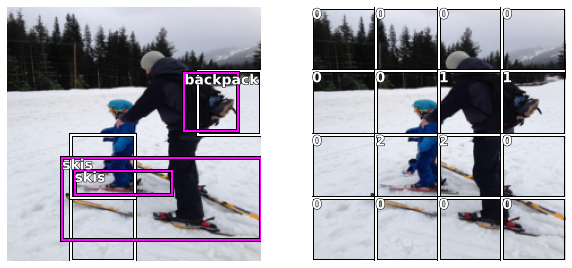

In [ ]:
# Visualize IOUs
# make fig with two axes
ctx = get_grid(2, figsize=[10,10])
# show each object's highest-IOU anchor box
show_bb(dec_im, anc_bbox[max_iou_ancs[1]], ctx=ctx[0]) 
show_bb(dec_im, bbox, lbl, color='magenta', ctx=ctx[0])
# label anchor boxes with the idx of the highest-IOU object
show_bb(dec_im, anc_bbox, max_iou_bbs[1].tolist(), use_vocab=False, ctx=ctx[1]);